# Interactive visualization of data across geographical regions

## Introduction

In the previous two chapters, you learnt how to build interactive visualizations to present different features in a dataset across features that represent different strate and different time points. In this chapter, you are going to add another type of visualization to your skillset - plotting interactive visualizations with geographical data. 

Most datasets generated in the today's world involve some features depicting spatial or geographical aspects. For example, users of social media platforms are characterized by the different parts of the world they reside in, world development metrics are calculated for different countries in the world, transportation routes span many different locations across the globe, and so on. Therefore, it is essential to learn systematic ways to understand and present such information in a digestible yet insightful manner. This chapter will help you develop this ability by providing the necessary tools to generate a variety of plots depicting geographical data. 

While altair and geopandas provide exciting possibilites in visualizing geographical data, we believe that plotly is especially great for generating a variety of geographical plots that are easy to build, debug, and customize. Therefore, in this chapter, we will be using plotly to demonstrate generating three different classes of geographical plots with multiple publicly available datasets from a variety of contexts. We hope that, through this chapter, you will appreciate that plotly is (although arguably) one of the most powerful, intuitive, and easy-to-use libraries for the task of rendering interactive geographical plots.

## Pre-requisites

In order to run the different code components in this chapter, you will need the following requirements satisfied on your system:
- installation of nodejs and npm from the [official website](https://nodejs.org/en/download/)
- installation of JupyterLab plotly extension: run `jupyter labextension install @jupyterlab/plotly-extension` on your terminal/command line

## Learning outcomes

By the end of this chapter, you will be able to: 
* generate interactive choropleth maps: choropleth maps depicting countries in the world and maps depicting states in the US, making layout changes to add functionality/aesthetic appeal, adding animation  
* generate interactive scatter plots on maps: scatter plots indicating geolocations of places of interest, interactive bubble plots on maps
* generate interactive line plots on maps: line plots indicating trajectories on the map

## Choropleth maps

Although the term 'choropleth maps' may or may not be familiar to you, the concept of choropleth map is something very natural and intuitive for even a layman. A choropleth map is a map of a region whose different divisions are colored to indicate the value of a specific feature in that division. For example, one may visualize country-wise population on the world map, state-wise population on the country map, the percentage of population with access to a certain technology, etc with a choropleth map. This 'division' may be a country, state, district or any other well-documented area.

Let us start with a concrete example of a world-wide choropleth map.

### World maps 

In our first visualization of the chapter, we are going to use the Internet Usage statistics published on 'Our World In Data' (https://ourworldindata.org/internet) and records the percentage of population using internet in each country from 1990 to 2017. The dataset is hosted on the course github repository for easy access. Here's what the dataset looks like:

In [1]:
import pandas as pd

internet_usage_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/share-of-individuals-using-the-internet.csv"
internet_usage_df = pd.read_csv(internet_usage_url)
internet_usage_df.head()

Country Code  Year  Individuals using the Internet (% of population)
0  Afghanistan  AFG  1990                                          0.000000
1  Afghanistan  AFG  2001                                          0.004723
2  Afghanistan  AFG  2002                                          0.004561
3  Afghanistan  AFG  2003                                          0.087891
4  Afghanistan  AFG  2004                                          0.105809

Did you notice the feature called 'Code' in the dataset? This refers to a code assigned to each country by a standard called ISO 3166-1, and is widely used so that developers across the world may have a common way to refer and access country names in any data. You may learn more about the standard [here](https://en.wikipedia.org/wiki/ISO_3166-1). The 'Code' feature is also used by plotly to map data to the appropriate locations on the world map, as we will see soon.

Since the dataframe contains records from multiple years, let us first subset the data to one specific year, say 2016:

In [48]:
internet_usage_2016 = internet_usage_df.query("Year==2016")
internet_usage_2016.head()

Country Code  Year  \
783                   Cambodia  KHM  2016   
1287                   Denmark  DNK  2016   
916   Central African Republic  CAF  2016   
833                     Canada  CAN  2016   
130        Antigua and Barbuda  ATG  2016   

      Individuals using the Internet (% of population)  
783                                          32.398452  
1287                                         96.967785  
916                                           4.000000  
833                                          91.160000  
130                                          73.000000

We are going to use the express module from plotly and use the choropleth function from the module. The first argument passed to this function is the dataframe which we want to visualize. In addition, the following parameters are set:
- locations: is set to the name of the column in the dataframe which contains the ISO 3166 country codes
- color: is set to the name of the column which contains the numerical feature using which the map is to be color-coded
- hover_name: is set to the name of the column which contains the feature that is to be displayed while hovering over the map
- color_continuous_scale: is set to a color scheme e.g. `Blues` | `Reds` | `Greens` | `px.colors.sequential.Plasma`. For more options, see the plotly express [documentation](https://www.plotly.express/plotly_express/colors/index.html).

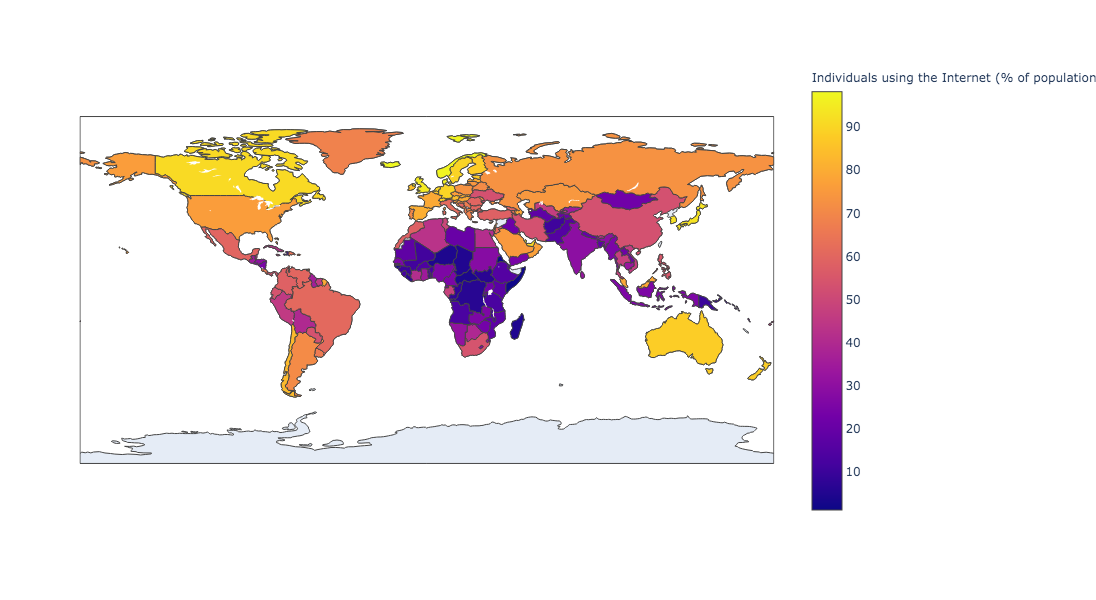

In [49]:
import plotly.express as px

fig = px.choropleth(internet_usage_2016,
                    locations="Code", # colunm containing ISO 3166 country codes
                    color="Individuals using the Internet (% of population)", # column by which to color-code
                    hover_name="Country", # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

That was a quick way to a get a beautiful plot! Let us look at the plot carefully and see if the observations match with our general knowledge. As one would expect, internet usage in the western world is higher than in the east. It is interesting that a higher percentage of population in Australia and Canada have access to internet than the US and most European countries.

What else does the plot show? Did you look at the sidebar on the top right of the plot. You will see options for selection types, zooming in and out, resetting the plot, and even taking a snapshot of the plot in your choice of configuration. It is worth the time to play around with the options a bit.

Now, we will see how to make some simple changes to the layout of the map using the update_layout function. The following code demonstrates how to add a title text for the map.

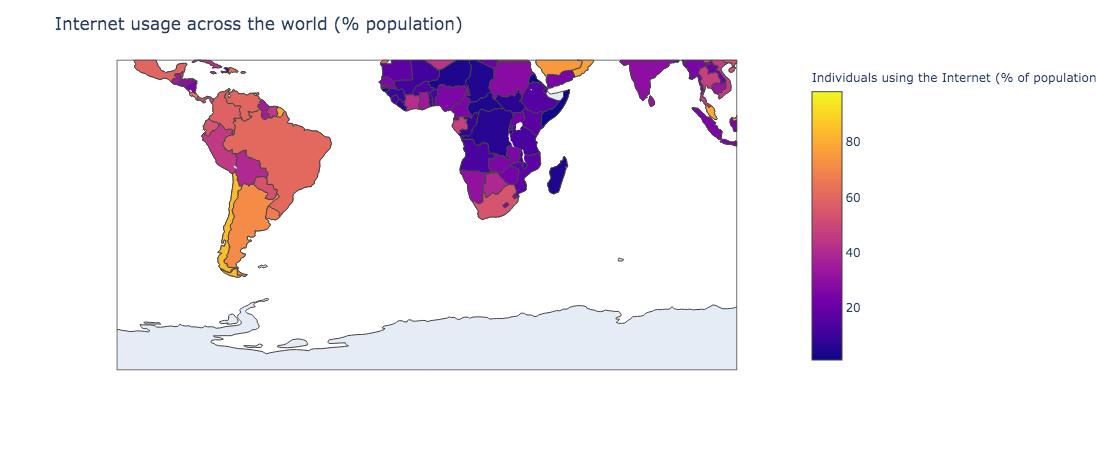

In [5]:
import plotly.express as px
fig = px.choropleth(internet_usage_2016,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", # column by which to color-code
                    hover_name="Country", # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the world (% population) - 2016'
)

fig.show()

That's nice. But let us say, we are only interested in seeing the internet usage across the Asian continent. We can quickly do with a code like below:

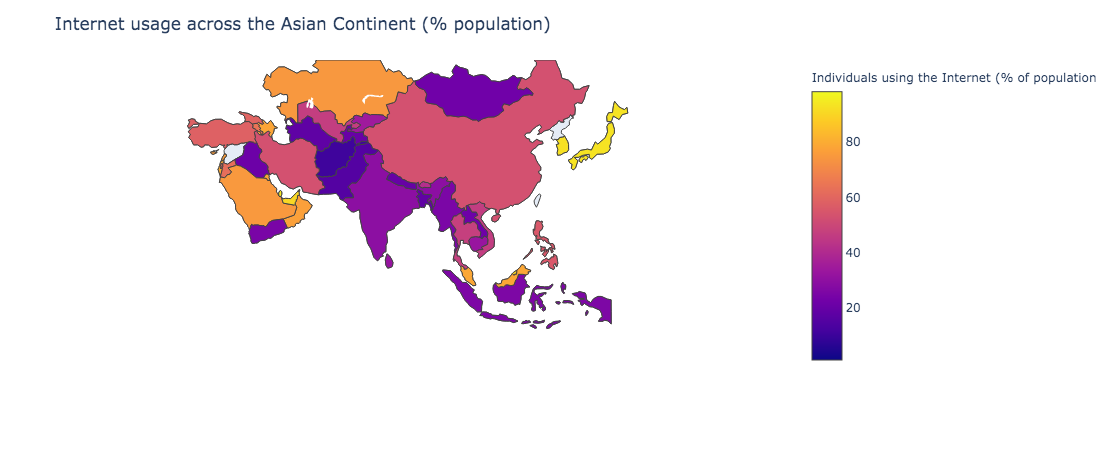

In [8]:
import plotly.express as px
fig = px.choropleth(internet_usage_2016,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", # column by which to color-code
                    hover_name="Country", # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the Asian Continent (% population) - 2016',
    geo_scope = 'asia' # can be set to north america | south america | africa | asia | europe | usa
)

fig.show()

Did you try dragging the plots and notice that it can move up and down or left and right? Wouldn't it be nice if the plot could rotate like a real globe? Well, that's easily possible too. All you need to do is to change the projection style of the map like so:

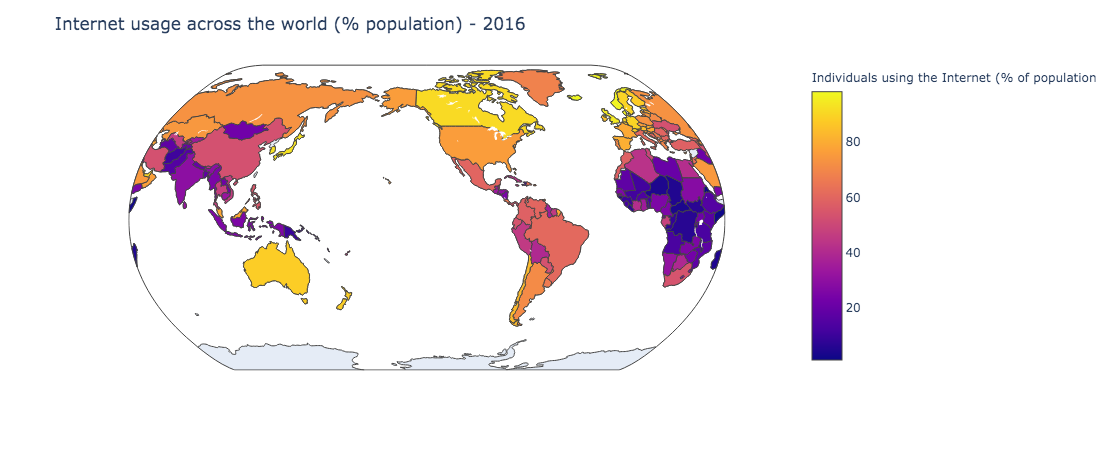

In [10]:
import plotly.express as px
fig = px.choropleth(internet_usage_2016,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", # column by which to color-code
                    hover_name="Country", # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the world (% population) - 2016',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)

fig.show()

Try dragging the map now. The rotation gives the plot a much more realistic touch! Plotly offers many . To experiment with other projection styles apart from the ones we have seen in our examples, visit the official plotly documentation [here](https://plot.ly/python/reference/#layout-geo-projection).

It's now time to up the game! So far, we have been generating all our plots for the records in a single year -- 2016. What about all the other timepoints? While it is definitely possible to generate plots individually for each year we are interested in, that is not the most optimal use of developer time. Enter animation.

Animation in plotly choropleth maps is surprisingly easy. We simply need to set a parameter called `animation_frame` to the name of the column with respect to which we wish to animate our visualization.

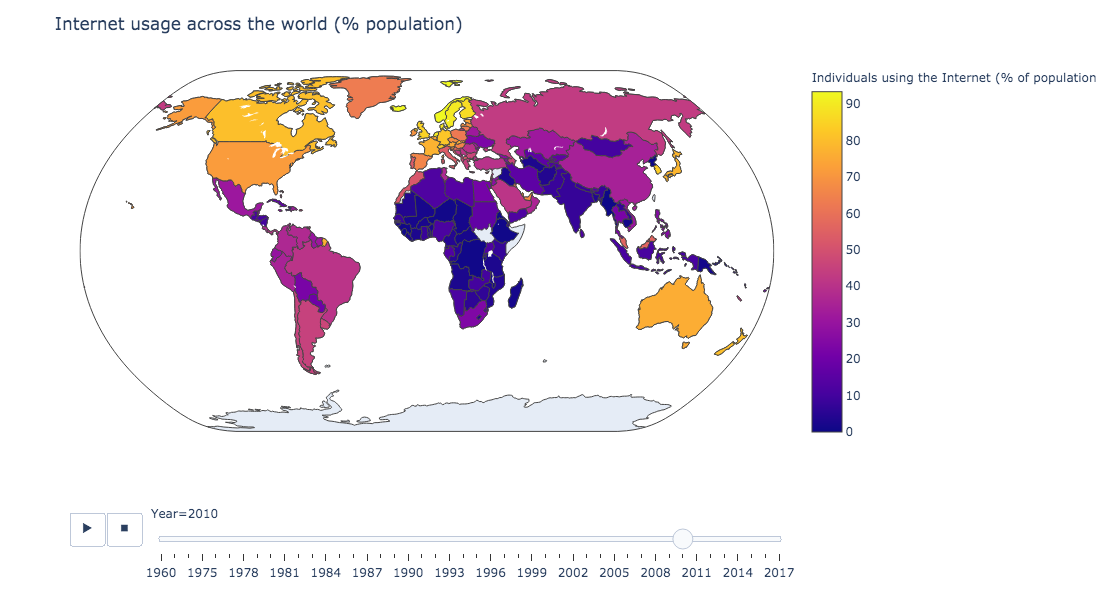

In [50]:
import plotly.express as px
fig = px.choropleth(internet_usage_df, locations="Code",
                    color="Individuals using the Internet (% of population)", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    animation_frame="Year", # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the world (% population)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)

fig.show()

Notice that the first argument to our choropleth function is the dataframe `internet_usage_df` which contains records for all the years between 1970-2017, and not `internet_usage_2016` as we had been using until now. If we use the `internet_usage_2016` dataframe, we would get a still plot with no slider, since there would nothing to animate with records for a single year.

The animation functionality is really cool and the slider is a simple way to get a quick view of how internet usage has grown in different countries of the world across the years. However, something with the slider is funny! The years on the slider are not in the right order -- it starts with 1990 then goes all the way upto 2015 and then goes back to 1970... The easiest way to fix this issue is to sort the dataframe by time (the 'Year' feature). 

In [13]:
internet_usage_df.sort_values(by=["Year"],inplace=True)
internet_usage_df.head()

Country Code  Year  \
5347  Syrian Arab Republic  NaN  1960   
718                Burundi  BDI  1960   
5493                  Togo  TGO  1960   
572               Botswana  BWA  1960   
3414              Maldives  MDV  1960   

      Individuals using the Internet (% of population)  
5347                                               0.0  
718                                                0.0  
5493                                               0.0  
572                                                0.0  
3414                                               0.0

Now that the sorting is done, let us generate the animated plot again.

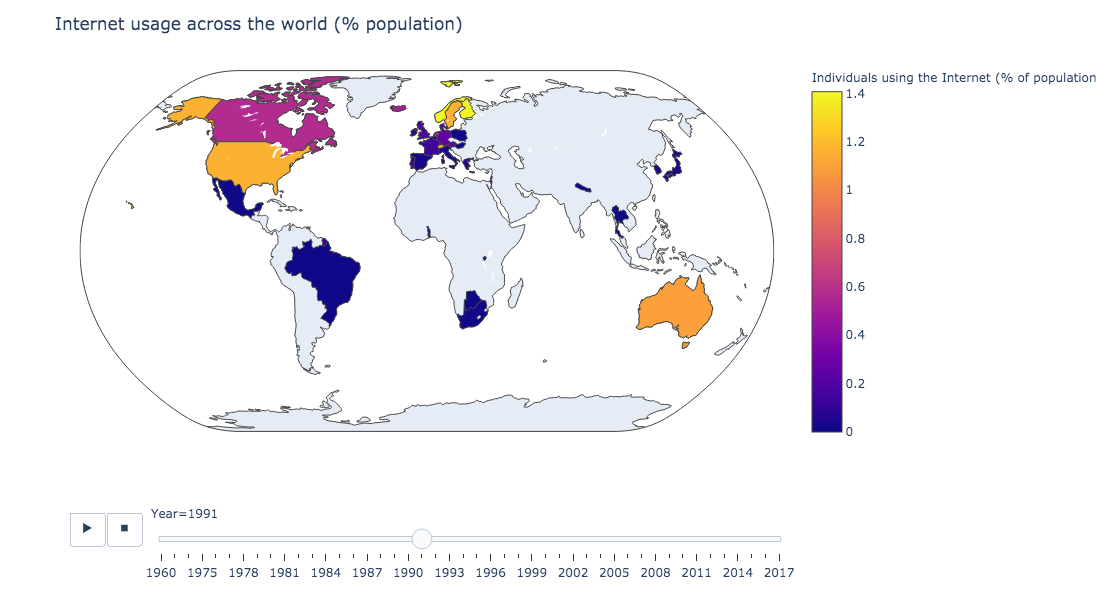

In [51]:
import plotly.express as px
fig = px.choropleth(internet_usage_df, locations="Code",
                    color="Individuals using the Internet (% of population)", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    animation_frame="Year", # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the world (% population)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)

fig.show()

And this time it's right!

There is one more point that needs to addressed before we close our discussion on world map chorpleths. In your work, you may come across datasets that would be interesting to visualize on a geographical map but do not have a column that indicates their ISO 3166-1 code. In such cases, you can download the country codes from the [ISO official website](https://www.iban.com/country-codes). For easy access, we have also uploaded these country codes on the course repository. Here's how the dataset looks:

In [15]:
# get the country codes data stored at the github repository
import pandas as pd

country_codes_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/country_codes.tsv"
country_codes = pd.read_csv(country_codes_url, sep='\t')
country_codes.head()

Country Alpha-2 code Alpha-3 code  Numeric
0     Afghanistan           AF          AFG        4
1         Albania           AL          ALB        8
2         Algeria           DZ          DZA       12
3  American Samoa           AS          ASM       16
4         Andorra           AD          AND       20

### USA state maps

To generate the choropleth maps for states in the US, we will be using the state-wise population data made available on the US [census website](https://www.census.gov/newsroom/press-kits/2018/pop-estimates-national-state.html). We have also made the data available on the course github repository.

In [16]:
import pandas as pd

us_population_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/us_state_population.tsv'
df = pd.read_csv(us_population_url, sep='\t')
df.head()

State Code      2010      2011      2012      2013      2014  \
0     Alabama   AL   4785448   4798834   4815564   4830460   4842481   
1      Alaska   AK    713906    722038    730399    737045    736307   
2     Arizona   AZ   6407774   6473497   6556629   6634999   6733840   
3    Arkansas   AR   2921978   2940407   2952109   2959549   2967726   
4  California   CA  37320903  37641823  37960782  38280824  38625139   

       2015      2016      2017      2018  
0   4853160   4864745   4875120   4887871  
1    737547    741504    739786    737438  
2   6833596   6945452   7048876   7171646  
3   2978407   2990410   3002997   3013825  
4  38953142  39209127  39399349  39557045

It is nice that this dataset, too, has the state codes available in the feature 'Code'. However, the data is not in the format we would want it to be -- it's in the wide format, and we need it to be long. Now is the time to scratch our memory on the material learnt in the very first chapter in the book! 

Assuming you have spent some time to come up with the method for this dataframe transformation yourself, here is the answer. We can use the 'melt' function to convert the dataframe in the desired format:

In [52]:
df = pd.melt(df, id_vars=['State', 'Code'], var_name="Year", value_name="Population")
df.head()

State Code  Year Population
0     Alabama   AL  Year       2010
1      Alaska   AK  Year       2010
2     Arizona   AZ  Year       2010
3    Arkansas   AR  Year       2010
4  California   CA  Year       2010

Once you know how to generate a choropleth map for countries in the world, the US choropleth map is quite straight-forward, especially if you note a few similarities and differences. Unlike the case of generating a world map choropleth where we used the plotly express module, we use the graph_objects module to generate the choropleth map for states in the US. There are three simple steps in drawing the US choropleth: 

1. Import the graph_objects module.

In [19]:
import plotly.graph_objects as go

2. Initialize the figure with the Figure function in graph_objects. Speficially, the `data` argument needs to be an instance of the Choropleth class with the following parameters:
- locations: is set to the the column of the dataframe which contains the state name codes
- z: is set to the the column containing the numerical feature using which the map is to be color-coded
- locationmode: is set to 'USA-states'
- colorscale: is set to a color scheme e.g. Blues | Reds | Greens, etc. For more options, see the [plotly official documentation](https://plot.ly/python/reference/).
- colorbar_title: is set to the title of the color bar on the right indicating the correspondence of color and feature values

In [19]:
# initialize the figure
fig = go.Figure(
    data=go.Choropleth(
        locations=df['Code'], # Code for US states
        z = df['Population'].astype(int), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Blues',
        colorbar_title = "Population",
    )
)

3. Make changes to the layout with update_layout() - set title_text and geo_scope.

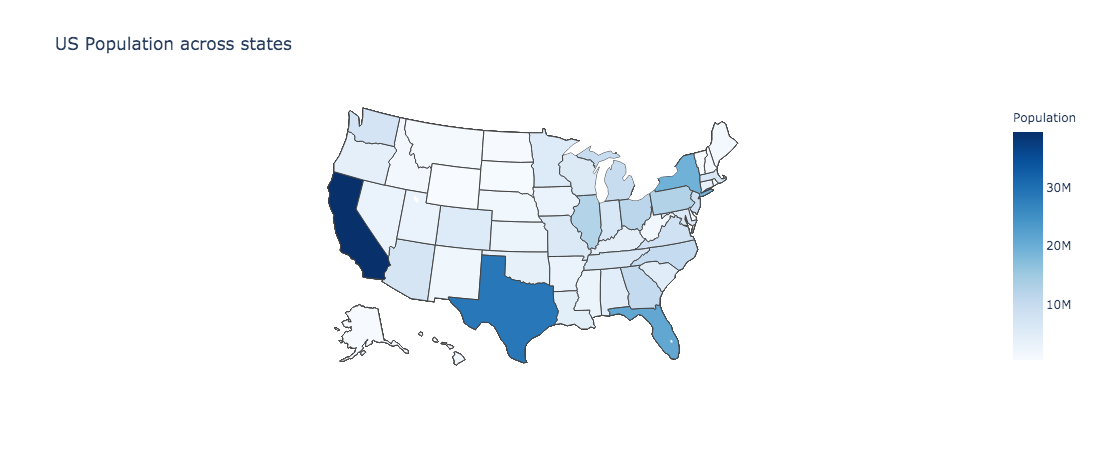

In [19]:
# update layout
fig.update_layout(
    title_text = 'US Population across states',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

### Topic summary

Choropleth maps are an effective way to visualize aggregate statistics across divisions of a geographical region. Two modules from plotly -- express and graph_objects -- can be used to generate interactive choropleth maps. The modules map records of divisions such as countries and states to locations on the geographical maps using a system of standardised country and state code names.

### Assessment Questions

The desired dataframe format for visualization using plotly express is: </br>
a) long </br>
b) narrow </br>
c) wide </br>
d) any one of long or wide </br>

answer: a

Which of the following is an optimal way to animate a choropleth map using plotly express with respect to a feature 'T' in the dataframe containing geographical data? </br>
a) Write a function that takes in each value of feature 'T' as an argument and returns the choropleth map for that value </br>
b) Set the animation_frame parameter to 'T' </br>
c) The bar plot can be obtained in pandas using the function plot(kind='bar') without any prior transformation of the dataframe </br>
d) Animation is not possible in choropleth maps drawn with plotly express </br>

answer: b

## Scatter plots on geographical maps

In this section, you will learn how to draw scatter plots on maps. The most intuitive plot of this type is the one that simply pinpoints certain locations of interest on the map.  

### Scatter plots

In our first example, we will be plotting the locations of Walmart stores on the US map. This dataset is [publicly available](https://github.com/plotly/datasets/) on the plotly website, and has been made available on the github course repository.

In [20]:
import pandas as pd

walmart_locations_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/1962_2006_walmart_store_openings.csv"
walmart_loc_df = pd.read_csv(walmart_locations_url)
walmart_loc_df.head()

storenum OPENDATE date_super  conversion  st  county  \
0         1   7/1/62     3/1/97         1.0   5       7   
1         2   8/1/64     3/1/96         1.0   5       9   
2         4   8/1/65     3/1/02         1.0   5       7   
3         8  10/1/67     3/1/93         1.0   5      29   
4         7  10/1/67        NaN         NaN   5     119   

               STREETADDR            STRCITY STRSTATE  ZIPCODE   type_store  \
0        2110 WEST WALNUT             Rogers       AR    72756  Supercenter   
1        1417 HWY 62/65 N           Harrison       AR    72601  Supercenter   
2       2901 HWY 412 EAST     Siloam Springs       AR    72761  Supercenter   
3   1621 NORTH BUSINESS 9          Morrilton       AR    72110  Supercenter   
4  3801 CAMP ROBINSON RD.  North Little Rock       AR    72118     Wal-Mart   

         LAT       LON  MONTH  DAY  YEAR  
0  36.342235 -94.07141      7    1  1962  
1  36.236984 -93.09345      8    1  1964  
2  36.179905 -94.50208      8    1  1965  
3  35.156491 -92.75858     10    1  1967  
4  34.813269 -92.30229     10    1  1967

We will again be usnig the graph_objects module for generating our scatterplot on the US map. Like the choropleth map, we will use the Figure function from graph_objects and the update_layout() function. However, this time, we will be assiging an instance of the Scattergeo class as the argument to Figure(). We will be passing the longitudes and latitudes of our locations of interest using the lon and lat parameters.

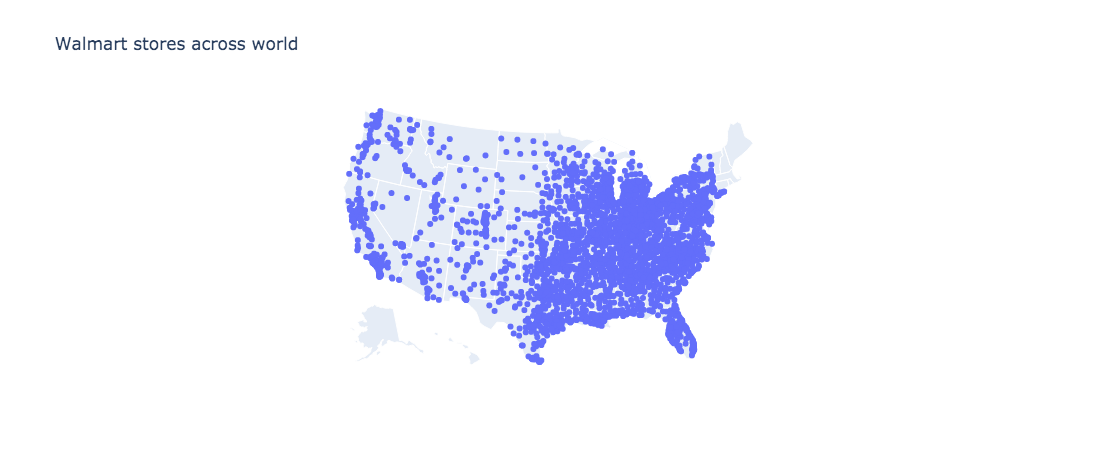

In [53]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = walmart_loc_df['LON'], # column containing longitude information of the locations to plot
        lat = walmart_loc_df['LAT'], # column containing latitude information of the locations to plot
        text = walmart_loc_df['STREETADDR'], # column containing value to be displayed on hovering over the map
        mode = 'markers' # a marker for each location
        ))

fig.update_layout(
        title = 'Walmart stores across world',
        geo_scope='usa',
    )

fig.show()

And that's it -- a scatter plot  on a map. A striking observation is that Walmart is much more prominent in the east than the west of US.

### Bubble plots

Since the eastern side of the map appears very densely populated with Walmart stores, it might be a good idea to show an aggregate feature, such as count of Walmart stores, across the different states. Bubble plots are designed for exactly this kind of visualization. In the current context of visualizing geographical data, bubble plots are plots with as many bubbles as regions of interest, where the bubble sizes depend on the value they are indicating -- bigger the value, bigger the bubble.

So, let us first compute the number of Walmart stores per state. If you don't remember how to do this, it might be a good idea to revise the relevant concepts from the first chapter.

In [54]:
walmart_stores_by_state = walmart_loc_df.groupby('STRSTATE').count()['storenum'].reset_index().rename(columns={'storenum':'NUM_STORES'})
walmart_stores_by_state.head()

STRSTATE  NUM_STORES
0       AL          90
1       AR          81
2       AZ          55
3       CA         159
4       CO          56

For generating the bubble plots, we will use the plotly express module and the scatter_geo function. Notice how the `locations` parameter is set to the name of column which contains state codes, and the `size` parameter is set to the feature NUM_STORES.

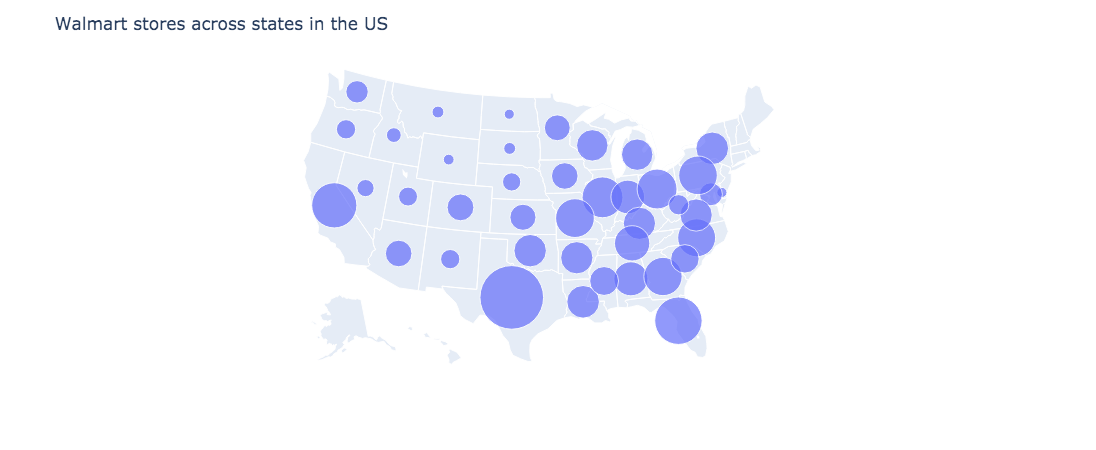

In [23]:
import plotly.express as px

fig = px.scatter_geo(walmart_stores_by_state, 
                    locations="STRSTATE", # name of column which contains state codes
                    size="NUM_STORES", # name of column which contains aggregate value to visualize
                    locationmode = 'USA-states',
                    hover_name="STRSTATE",
                    size_max=45)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Walmart stores across states in the US',
    # limit plot scope to USA
    geo_scope='usa'
)

fig.show()

Can you think of any other contexts that a bubble plot may be useful to visualize? How about revisiting the internet usage data (percentage of population using internet in each country) to generate a world-wide bubble plot? However, bubble plots are more suitable and intuitive for presenting counts/numbers, rather than percentages in individual regions. 

It turns out, that the number of individuals using internet in each country is also available from the same resource ([Our World in Data](https://ourworldindata.org/internet) which we used to collect our previous data. We have made the data available on the course repository.

In [56]:
import pandas as pd

internet_users_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/number-of-internet-users-by-country.csv"
internet_users_df = pd.read_csv(internet_users_url)
internet_users_df.head()

Country Code  Year  Number of internet users (users)
0  Afghanistan  AFG  1990                                 0
1  Afghanistan  AFG  2001                               990
2  Afghanistan  AFG  2002                              1003
3  Afghanistan  AFG  2003                             20272
4  Afghanistan  AFG  2004                             25520

Learning from our previous experience, let us sort the dataframe by the Year feature.

In [25]:
internet_users_df.sort_values(by=['Year'],inplace=True)
internet_users_df.head()

Country Code  Year  Number of internet users (users)
0           Afghanistan  AFG  1990                                 0
1257            Eritrea  ERI  1990                                 0
1236  Equatorial Guinea  GNQ  1990                                 0
4016              Timor  TLS  1990                                 0
1214        El Salvador  SLV  1990                                 0

Let's first plot the number of users using internet across the world in 2016.

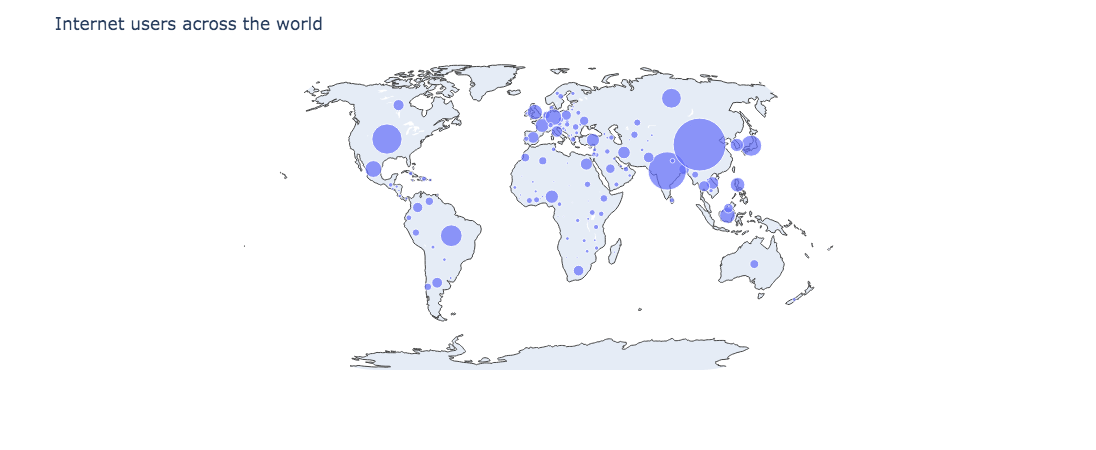

In [27]:
import plotly.express as px

fig = px.scatter_geo(internet_users_df.query("Year==2016"), 
                    locations="Code", # name of column indicating country-codes
                    size="Number of internet users (users)", # name of column by which to size the bubble
                    hover_name="Country", # name of column to be displayed while hovering over the map
                    size_max=80, # parameter to scale all bubble sizes
                    color_continuous_scale=px.colors.sequential.Plasma)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet users across the world - 2016',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)

fig.show()

Notice how the largest number of users come from India and China? Since we know from our previous dataset that the percentage of population using internet in these countries is low, this large user group can be attributed to the vast population of these countries.

Now, let us animate the bubble plot to show increase in number of internet users across the years, by using the `animation_frame` parameter.

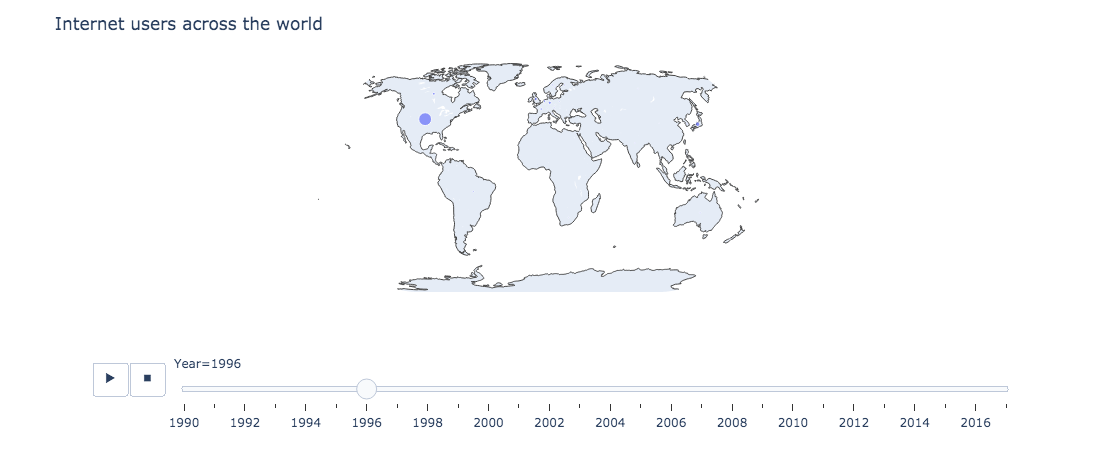

In [26]:
import plotly.express as px

fig = px.scatter_geo(internet_users_df, 
                    locations="Code", # name of column indicating country-codes
                    size="Number of internet users (users)", # name of column by which to size the bubble
                    hover_name="Country", # name of column to be displayed while hovering over the map
                    size_max=80, # parameter to scale all bubble size
                    animation_frame="Year",
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet users across the world',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)

fig.show()

### Topic summary

Scatter plots on maps can be used to show specific locations of interest on geographical maps, whereas bubble maps are a nice way to present count data across different divisions of a geographical region. The Scattergeo function from plotly graph_objects and the scatter_geo function from plotly express are generally used to generate interactive scatter and bubble plots on maps.


### Assessment Questions

1. The function to generate a scatter plot with plotly express on a world map is: </br>
a) px.scatter_geo </br>
b) px.Figure </br>
c) px.Scattergeo </br>
d) none of these </br>

answer: a

2. Which of the following feature is most suitably represented by a bubble plot on a geographical map?
a) a feature indicating percentage of population subscribing to a news site per region on the map </br>
b) a feature indicating counts of subscriptions to the news site per region on the map </br>
c) a feature indicating ratio of subscription by conservatives and liberals per region on the map </br>
d) none of these </br>

answer: b

## Line plots on geographical maps

Line plots rendered on maps are another important class of visualization with geographical data. 

For this section, we will be using the airports and flights data from the 2015 Flight Delays and Cancellations data released by The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics. Since the dataset is huge, we will only include the data for all  flights with airline delays on Jan 1, 2015. This reduced dataset contains records of 1820 flights and is made available in the course github repository as two files:
- airports.csv: containing location attributes such as latitude, longitude information of all airports
- new_year_day_2015_delayed_flights.csv: flight details such as flight number, origin and destination airport of all flights in the selected subset

Let us load the airports file first.

In [28]:
import pandas as pd

us_airports_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/airports.csv"
us_airports_df = pd.read_csv(us_airports_url)
us_airports_df.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

We can generate a scatter plot on the US map to indicate the locations of all airports in our dataset, using the graph_objects module.

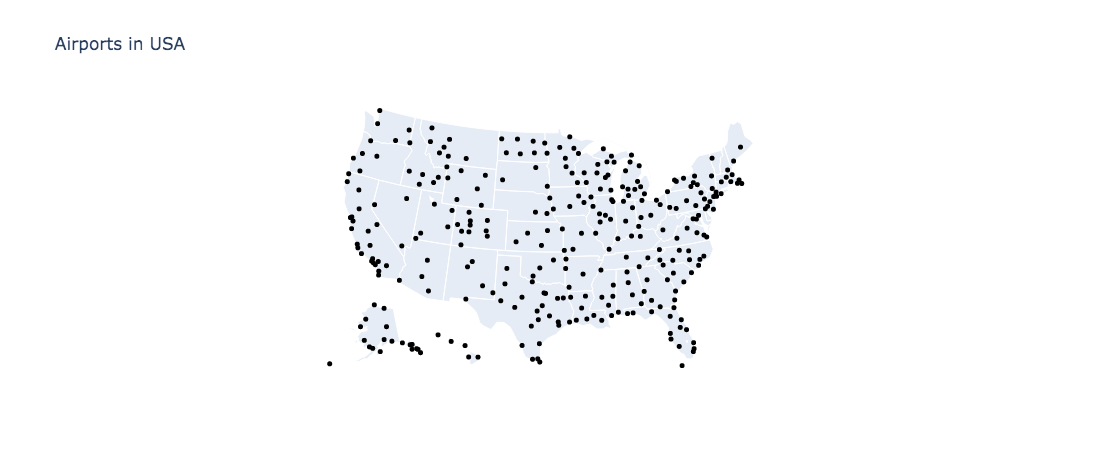

In [29]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = us_airports_df['LONGITUDE'],
    lat = us_airports_df['LATITUDE'],
    hoverinfo = 'text',
    text = us_airports_df['AIRPORT'],
    mode = 'markers',
    marker = dict(size = 5,color = 'black')))

fig.update_layout(
    title_text = 'Airports in USA',
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'usa'
    ),
)

fig.show()

That is neat! 

Did you notice that there is an add_trace() function in addition to the usual instance creation of Scattergeo class? The add_trace function is used because we are about to superimpose our flight data in the form of lines on top of this scatterplot on the map. The 'added trace' allows plotly to treat the scatter plot and the line plots as multiple layers on the map.

Now let us load the file containing flight records.

In [30]:
new_year_2015_flights_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/new_year_day_2015_delayed_flights.csv"
new_year_2015_flights_df = pd.read_csv(new_year_2015_flights_url)
new_year_2015_flights_df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      DL            806      N3730B   
1  2015      1    1            4      DL           1173      N826DN   
2  2015      1    1            4      DL           2336      N958DN   
3  2015      1    1            4      DL           1434      N547US   
4  2015      1    1            4      DL           2324      N3751B   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            SFO                 MSP                   25  ...         610.0   
1            LAS                 ATL                   30  ...         656.0   
2            DEN                 ATL                   30  ...         453.0   
3            LAX                 MSP                   35  ...         605.0   
4            SLC                 ATL                   40  ...         553.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0            8.0         0          0                  NaN               NaN   
1          -15.0         0          0                  NaN               NaN   
2          -30.0         0          0                  NaN               NaN   
3           -4.0         0          0                  NaN               NaN   
4          -22.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN  

[5 rows x 31 columns]

Along with the source and destination airports for each flight, we need to have the longitude and latitude information of the corresponding airports. To do this, we need to merge the dataframes containing airport and flight data. Let us first merge to obtain longitude and latitudes for the origin airports of all flights.

In [31]:
# merge the dataframes on origin airport codes
new_year_2015_flights_df = new_year_2015_flights_df.merge(us_airports_df[['IATA_CODE','LATITUDE','LONGITUDE']], \
                                                          left_on='ORIGIN_AIRPORT', \
                                                          right_on='IATA_CODE', \
                                                          how='inner')

# drop the duplicate column containing airport code
new_year_2015_flights_df.drop(columns=['IATA_CODE'],inplace=True)

# rename the latitude and longitude columns to reflect that they correspond to the origin airport
new_year_2015_flights_df.rename(columns={"LATITUDE":"ORIGIN_AIRPORT_LATITUDE", "LONGITUDE":"ORIGIN_AIRPORT_LONGITUDE"},inplace=True)
new_year_2015_flights_df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      DL            806      N3730B   
1  2015      1    1            4      DL           1723      N336NB   
2  2015      1    1            4      DL           1866      N827DN   
3  2015      1    1            4      DL            418      N706TW   
4  2015      1    1            4      DL           2566      N913DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  DIVERTED  \
0            SFO                 MSP                   25  ...         0   
1            SFO                 SLC                  605  ...         0   
2            SFO                 ATL                  615  ...         0   
3            SFO                 JFK                  630  ...         0   
4            SFO                 MSP                  640  ...         0   

   CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0          0                  NaN               NaN             NaN   
1          0                  NaN               NaN             NaN   
2          0                  NaN               NaN             NaN   
3          0                  NaN               NaN             NaN   
4          0                  NaN               NaN             NaN   

   AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  ORIGIN_AIRPORT_LATITUDE  \
0            NaN                  NaN            NaN                   37.619   
1            NaN                  NaN            NaN                   37.619   
2            NaN                  NaN            NaN                   37.619   
3            NaN                  NaN            NaN                   37.619   
4            NaN                  NaN            NaN                   37.619   

   ORIGIN_AIRPORT_LONGITUDE  
0                -122.37484  
1                -122.37484  
2                -122.37484  
3                -122.37484  
4                -122.37484  

[5 rows x 33 columns]

Now, we will perform a similar merging to get the latitude, longitude data for destination airports of all flights.

In [32]:
# merge the dataframes on desintation airport codes
new_year_2015_flights_df = new_year_2015_flights_df.merge(us_airports_df[['IATA_CODE','LATITUDE','LONGITUDE']], \
                                                          left_on='DESTINATION_AIRPORT', \
                                                          right_on='IATA_CODE', \
                                                          how='inner')

# drop the duplicate column containing airport code
new_year_2015_flights_df.drop(columns=['IATA_CODE'],inplace=True)

# rename the latitude and longitude columns to reflect that they correspond to the destination airport
new_year_2015_flights_df.rename(columns={'LATITUDE':'DESTINATION_AIRPORT_LATITUDE', 'LONGITUDE':'DESTINATION_AIRPORT_LONGITUDE'},inplace=True)
new_year_2015_flights_df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      DL            806      N3730B   
1  2015      1    1            4      DL           2566      N913DN   
2  2015      1    1            4      DL           1106      N6711M   
3  2015      1    1            4      DL           2305      N525US   
4  2015      1    1            4      DL           1450      N671DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0            SFO                 MSP                   25  ...   
1            SFO                 MSP                  640  ...   
2            SFO                 MSP                  900  ...   
3            SFO                 MSP                 1230  ...   
4            LAS                 MSP                  105  ...   

   CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0                  NaN               NaN             NaN            NaN   
1                  NaN               NaN             NaN            NaN   
2                  NaN               NaN             NaN            NaN   
3                  NaN               NaN             NaN            NaN   
4                  NaN               NaN             NaN            NaN   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  ORIGIN_AIRPORT_LATITUDE  \
0                  NaN            NaN                 37.61900   
1                  NaN            NaN                 37.61900   
2                  NaN            NaN                 37.61900   
3                  NaN            NaN                 37.61900   
4                  NaN            NaN                 36.08036   

   ORIGIN_AIRPORT_LONGITUDE  DESTINATION_AIRPORT_LATITUDE  \
0                -122.37484                      44.88055   
1                -122.37484                      44.88055   
2                -122.37484                      44.88055   
3                -122.37484                      44.88055   
4                -115.15233                      44.88055   

   DESTINATION_AIRPORT_LONGITUDE  
0                      -93.21692  
1                      -93.21692  
2                      -93.21692  
3                      -93.21692  
4                      -93.21692  

[5 rows x 35 columns]

Now, we will draw our line plots -- for each flight, we need to draw a line between the origin and destination airport. This is done by providing the latitude and longitude values of destination and origin airports to the `lon` and `lat` parameters of Scattergeo and setting `mode` to 'lines' instead of 'markers'. Also, notice that we are using another add_trace function here. It may take a few minutes for the plot to show the flight routes.

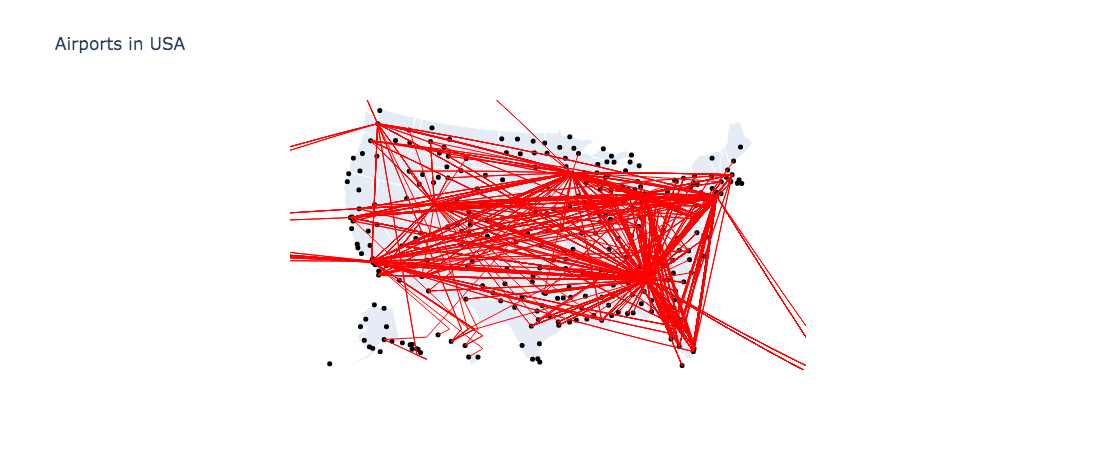

In [33]:
for i in range(len(new_year_2015_flights_df)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [new_year_2015_flights_df['ORIGIN_AIRPORT_LONGITUDE'][i], new_year_2015_flights_df['DESTINATION_AIRPORT_LONGITUDE'][i]],
            lat = [new_year_2015_flights_df['ORIGIN_AIRPORT_LATITUDE'][i], new_year_2015_flights_df['DESTINATION_AIRPORT_LATITUDE'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red')
        )
    )
    
fig.update_layout(
    title_text = 'Delayed flight on Jan 1, 2015 in USA',
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'usa'
    ),
)
  
fig.show()

And that is all for this section. Enjoy your newly-gained skill to create a variety of wonderful geographical plots!

### Topic summary

Line plots on geographical maps can be generated using the graph_objects module from plotly. Generally, a layering technique is used, with the help of the function add_trace() to superimpose two plots together on the map -- the locations being connected as a scatter plot, and the routes connecting various locations as line plots.

### Assessment Questions

1. Which of the following functions is used to add multiple types of plots (such as scatter and line) using graph_objects on a geographical map?: </br>
a) add_layer </br>
b) add_trace </br>
c) add_plot </br>
d) none of these </br>

answer: b

2. Which of the following aspects are different for drawing scatter plots and line plots using graph_objects on geographical maps:
a) mode='lines' for line plots and 'markers' for scatter plots </br>
b) lat and lon parameters are specified for a single location in scatter plot and for start and end location in line plot </br>
c) for finetuning aesthetics of a scatter plot, the marker parameter has to be specified in a scatter plot while the line parameter has to be specified in a line plot</br>
d) all of the above  </br>

answer: d

# Chapter summary

In this chapter, we presented three different types of visualization using geographical data -- choropleth maps, scatter and bubble plots on geographical maps, and line plots on geographical maps. Choropleth maps present aggregate statistics across different regions on a geographical maps. Scatter plots are effective in indicating details regarding specific locations of interest, whereas bubble plots are useful to present count data per region on the map. Line plots are helpful in visualizing the routes of transportation systems, etc.

These plots can be easily generated using the plotly express and graph_objects modules. Animation can be performed with respect to a discrete numeric feature in the dataset.

# Chapter quiz

1. The pandas function to convert format of a dataframe so that it is suitable for visualization with plotly express is: </br>
a) pd.melt </br>
b) pd.wide_to_long </br>
c) pd.long_to_wide </br>
d) a and c </br>

answer: d

2. Which of the following statements is/are false? (multiple answers may exist)
a) World choropleth map can be generated using plotly express function </br>
b) US choropleth map can be generated using plotly graph_objects function </br>
c) The geo_scope parameter can be specified as the name of any continent or country of interest to the developer </br>
d) The dataframe supplied to the plotly express function is automatically sorted based on the column name specified in the animation_frame parameter  </br>

answer: c, d

2. Which of the following feature is least suitably represented by a choropleth map?
a) a feature indicating percentage of population subscribing to a news site per region on the map </br>
b) a feature indicating counts of subscriptions to the news site per region on the map </br>
c) a feature indicating ratio of subscription by conservatives and liberals per region on the map </br>
d) none of the above </br>

answer: b

# Activity

We will be working with the Renewable Energy consumption and production datasets from [Our World in Data](https://ourworldindata.org/renewable-energy). These are made available on the course github repository as 'share-of-electricity-production-from-renewable-sources.csv' (production dataset) and 'renewable-energy-consumption-by-country.csv' (consumption dataset). Your task is to create choropleth maps for the total renewable energy production and consumption across different countries in the world animated based on the production/consumption years between (and excluding) 2007 and 2017.

High-level steps:

1. Load the renewable energy production dataset.
2. Sort the production dataframe based on the feature 'Year'.
3. Generate a choropleth map for renewable energy production using the plotly express module animated based on 'Year'.
4. Update layout to include suitable title text and projection style and display figure.
5. Load the renewable energy consumption dataset.
6. Convert the consumption dataframe to a suitable format for visualization.
7. Sort the consumption dataframe based on the feature 'Year'.
8. Generate a choropleth map for renewable energy consumption using the plotly express module animated based on 'Year'.
9. Update layout to include suitable title text and projection style and display figure.

Solution steps:

1. Load the renewable energy production dataset.

In [38]:
import pandas as pd

renewable_energy_prod_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/share-of-electricity-production-from-renewable-sources.csv"
renewable_energy_prod_df = pd.read_csv(renewable_energy_prod_url)
renewable_energy_prod_df.head()

Country Code  Year  Renewable electricity (% electricity production)
0  Afghanistan  AFG  1990                                         67.730496
1  Afghanistan  AFG  1991                                         67.980296
2  Afghanistan  AFG  1992                                         67.994310
3  Afghanistan  AFG  1993                                         68.345324
4  Afghanistan  AFG  1994                                         68.704512

2. Sort the production dataframe based on the feature 'Year'.

In [40]:
renewable_energy_prod_df.sort_values(by=['Year'],inplace=True)
renewable_energy_prod_df.head()

Country Code  Year  \
0                          Afghanistan  AFG  1990   
4173                             Samoa  WSM  1990   
4148  Saint Vincent and the Grenadines  VCT  1990   
4123                       Saint Lucia  LCA  1990   
4401                          Slovenia  SVN  1990   

      Renewable electricity (% electricity production)  
0                                            67.730496  
4173                                         40.000000  
4148                                         47.058824  
4123                                          0.000000  
4401                                         23.706204

3. Generate a choropleth map using the plotly express module animated based on 'Year'.

In [41]:
import plotly.express as px

renewable_energy_prod = renewable_energy_prod_df.query('Year<2017 and Year>2007')
fig = px.choropleth(renewable_energy_prod_df, locations="Code",
                    color="Renewable electricity (% electricity production)",
                    hover_name="Country", 
                    animation_frame="Year",
                    color_continuous_scale='Greens')

4. Update layout to include suitable title text and projection style and display figure.

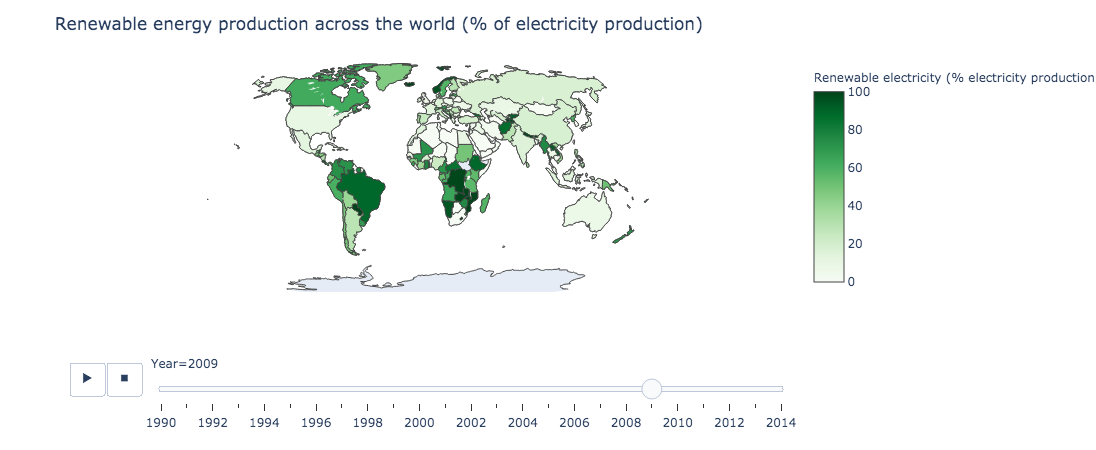

In [41]:
fig.update_layout(
    # add a title text for the plot
    title_text = 'Renewable energy production across the world (% of electricity production)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)

fig.show()

5. Load the renewable energy consumption dataset.

In [42]:
import pandas as pd

renewable_energy_cons_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/renewable-energy-consumption-by-country.csv"
renewable_energy_cons_df = pd.read_csv(renewable_energy_cons_url)
renewable_energy_cons_df.head()

Country Code  Year  Traditional biofuels  \
0  Algeria  DZA  1965                   NaN   
1  Algeria  DZA  1966                   NaN   
2  Algeria  DZA  1967                   NaN   
3  Algeria  DZA  1968                   NaN   
4  Algeria  DZA  1969                   NaN   

   Other renewables (modern biofuels, geothermal, wave & tidal)  Wind  \
0                                                0.0              0.0   
1                                                0.0              0.0   
2                                                0.0              0.0   
3                                                0.0              0.0   
4                                                0.0              0.0   

   Solar PV  Hydropower  Total  
0       0.0         NaN    0.0  
1       0.0         NaN    0.0  
2       0.0         NaN    0.0  
3       0.0         NaN    0.0  
4       0.0         NaN    0.0

6. Convert the dataframe to desired format.

In [43]:
#renewable_energy_long_df = pd.wide_to_long(renewable_energy_df, stubnames='Consumption', i=['Country', 'Code','Year'], j='Energy_Source')
#renewable_energy_long_df.head()
renewable_energy_cons_df = pd.melt(renewable_energy_cons_df, \
                                   id_vars=['Country', 'Code','Year'], \
                                   var_name="Energy Source", \
                                   value_name="Consumption (terrawatt-hours)")
renewable_energy_cons_df.head()

Country Code  Year         Energy Source  Consumption (terrawatt-hours)
0  Algeria  DZA  1965  Traditional biofuels                            NaN
1  Algeria  DZA  1966  Traditional biofuels                            NaN
2  Algeria  DZA  1967  Traditional biofuels                            NaN
3  Algeria  DZA  1968  Traditional biofuels                            NaN
4  Algeria  DZA  1969  Traditional biofuels                            NaN

7. Sort the consumption dataframe based on the Year feature. 

In [88]:
renewable_energy_cons_df.sort_values(by=['Year'], inplace=True)
renewable_energy_cons_df.head()

Country Code  Year                                      Energy Source  \
0      Algeria  DZA  1965                               Traditional biofuels   
4240   Finland  FIN  1965  Other renewables (modern biofuels, geothermal,...   
17252    Chile  CHL  1965                                              Total   
4292    France  FRA  1965  Other renewables (modern biofuels, geothermal,...   
4344   Germany  DEU  1965  Other renewables (modern biofuels, geothermal,...   

       Consumption (terrawatt-hours)  
0                                NaN  
4240                             0.0  
17252                            0.0  
4292                             0.0  
4344                             0.0

8. Generate a choropleth map for renewable energy consumption using the plotly express module animated based on 'Year'.

In [44]:
import plotly.express as px

renewable_energy_total_cons = renewable_energy_cons_df[renewable_energy_cons_df['Energy Source']=='Total'].query('Year<2017 and Year>2007')
fig = px.choropleth(renewable_energy_total_cons, locations="Code",
                    color="Consumption (terrawatt-hours)",
                    hover_name="Country", 
                    animation_frame="Year",
                    color_continuous_scale='Blues')

9. Update layout of the consuption plot to include suitable title text and projection style.

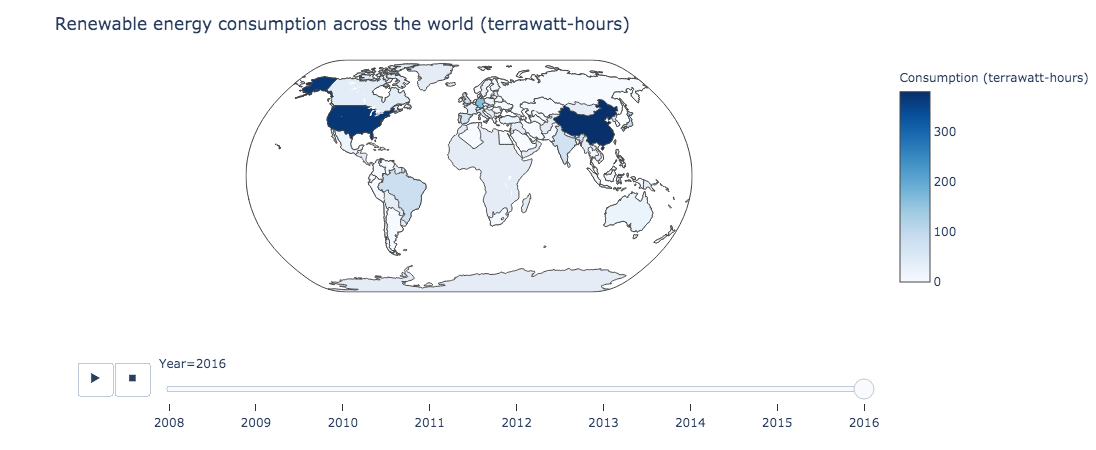

In [44]:
fig.update_layout(
    # add a title text for the plot
    title_text = 'Renewable energy consumption across the world (terrawatt-hours)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)

fig.show()